# Reading TREx RGB full-colour raw image data

Below we'll retrieve several different types of TREx RGB data, read them, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [20]:
import requests

In [36]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/TREx/RGB/stream0/2020/03/21/gill_rgb-04/ut06/20200321_0630_gill_rgb-04_full.h5"
r = requests.get(url)

In [37]:
# save data to a local file
#filename = "20200321_0630_gill_rgb-04_full.h5"
import os
filename = os.path.basename(url)
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [38]:
import trex_imager_readfile

In [41]:
img, meta, problematic_files = trex_imager_readfile.read_rgb(filename)

In [42]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d (%d channels)" % (img.shape[0], img.shape[1], img.shape[2]))
print("Number of images: %d" % (img.shape[3]))

Image dimensions: 480 x 553 (3 channels)
Number of images: 20


In [43]:
# data for the first image
img[:,:,:,0]

array([[[8, 7, 8],
        [7, 7, 6],
        [5, 5, 4],
        ...,
        [4, 6, 7],
        [4, 6, 5],
        [4, 5, 4]],

       [[5, 6, 7],
        [4, 6, 5],
        [4, 5, 4],
        ...,
        [5, 6, 5],
        [6, 6, 5],
        [3, 4, 5]],

       [[4, 6, 5],
        [3, 6, 5],
        [5, 8, 6],
        ...,
        [6, 5, 4],
        [6, 7, 6],
        [6, 6, 7]],

       ...,

       [[5, 6, 4],
        [6, 7, 4],
        [5, 6, 5],
        ...,
        [5, 4, 5],
        [4, 4, 4],
        [3, 4, 4]],

       [[5, 5, 5],
        [7, 5, 7],
        [5, 4, 4],
        ...,
        [6, 6, 6],
        [4, 5, 5],
        [5, 6, 6]],

       [[5, 6, 6],
        [6, 6, 6],
        [5, 5, 5],
        ...,
        [5, 5, 6],
        [5, 6, 6],
        [3, 5, 6]]], dtype=uint8)

In [44]:
# metadata for first image
meta[0]

{'Aperture': '4.0',
 'Camera model': 'Canon ME20F-SH',
 'Camera serial number': '072722600030',
 'Computer name': 'gill-rgb',
 'Frames per second': '50 (20ms between frames)',
 'Geographic latitude': '56.376723',
 'Geographic longitude': '-94.643664',
 'ISO': '30.0 dB',
 'Imager unique ID': 'rgb-04',
 'Lens model': 'Canon Fisheye Zoom EF 8-15mm 1:4L USM',
 'Lens serial number': '6710000336',
 'NTP delay': '0.000',
 'NTP jitter': '13.217',
 'NTP offset': '5.664',
 'NTP target': '127.127.20.0',
 'Operating system': 'Linux 4.4.179-1.el7.elrepo.x86_64 #1 SMP Sat Apr 27 08:29:04 EDT 2019',
 'Project unique ID': 'trex',
 'Site unique ID': 'gill',
 'System frequency': '50 Hz',
 'White balance': '4000 Kelvin',
 'Average includes subframe (#025)': '2020-03-21 06:30:00.172780 UTC',
 'Average includes subframe (#057)': '2020-03-21 06:30:00.812756 UTC',
 'Average includes subframe (#073)': '2020-03-21 06:30:01.132713 UTC',
 'Average includes subframe (#089)': '2020-03-21 06:30:01.452700 UTC',
 'Av

## Visualize the image

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt

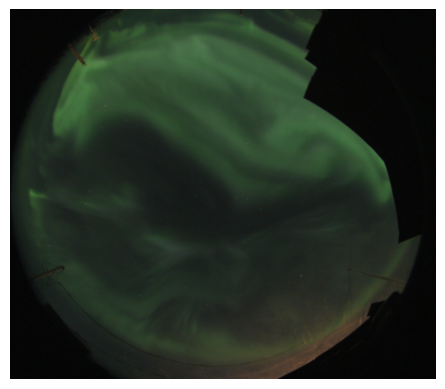

In [46]:
plt.imshow(img[:,:,:,0])
plt.axis("off")
plt.show() 

## Cleanup downloaded file

In [47]:
# remove the downloaded files
import os
os.remove(filename)